In [8]:
from glob import glob
from framed import load_cbmodel
import pandas as pd
from framed.io.sbml import sanitize_id
import cobra
from cobra.io import read_sbml_model
import pandas as pd
from operator import itemgetter

For intracellular **reversible** reactions, lower and upper bounds were set at -1000 and 1000 , respectively.
Contrarily, for intracellular **irreversible** reactions, lower and upper bounds were set at 0 and 1000 , respectively. The upper bound of all the exchange reactions was set at 1000 . It is conventional that all reactions in metabolic models must have infinite lower and upper bounds to accept any flux. This infinity is shown by setting 1000 , as 1000 is considered to be a huge and infinite flux amount.

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0254270

# **growth medium**
### of models <span style='color:green'> **with defined** </span> medium 

In [25]:
ModelDefinedMedium=read_sbml_model("LBmedium_Btheta_gram_gapFilled_after.xml.gz")
print('objective value', ModelDefinedMedium.optimize().objective_value)
print('number of exchange reactions', len(ModelDefinedMedium.exchanges))
# print('all exchange reactions of model \n', ModelDefinedMedium.exchanges)
# print('type', type(ModelDefinedMedium.exchanges))
# print(model.exchanges.keys) #doesn't work like a normal dictionary

print('number of non-zero/active exchange reactions', len(ModelDefinedMedium.medium))
print('non-zero/active exchange reactions of model \n', ModelDefinedMedium.medium)
# print('type', type(ModelDefinedMedium.medium))

MediumDefined_BoundList=[]
for Ex_rx in ModelDefinedMedium.medium.keys():
    MediumDefined_bounds=ModelDefinedMedium.reactions.get_by_id(Ex_rx).bounds
#     print(MediumDefined_bounds)
    MediumDefined_BoundList.append(MediumDefined_bounds)
MediumDefined_BoundList=list(set(MediumDefined_BoundList)) #this will remove the duplicates, so that we can see which boundaries exist in the medium
print('unique values of bounds of non-zero/active exchange reactions \n ', MediumDefined_BoundList)

objective value 1.4032473511565282
number of exchange reactions 253
number of non-zero/active exchange reactions 50
non-zero/active exchange reactions of model 
 {'EX_adn_e': 10.0, 'EX_ala__L_e': 10.0, 'EX_arg__L_e': 10.0, 'EX_aso3_e': 10.0, 'EX_asp__L_e': 10.0, 'EX_ca2_e': 10.0, 'EX_cl_e': 10.0, 'EX_cobalt2_e': 10.0, 'EX_cu2_e': 10.0, 'EX_cys__L_e': 10.0, 'EX_dad_2_e': 10.0, 'EX_dcyt_e': 10.0, 'EX_fe2_e': 10.0, 'EX_fe3_e': 10.0, 'EX_fol_e': 10.0, 'EX_glc__D_e': 10.0, 'EX_glu__L_e': 10.0, 'EX_gly_e': 10.0, 'EX_h2o_e': 10.0, 'EX_h2s_e': 10.0, 'EX_h_e': 10.0, 'EX_his__L_e': 10.0, 'EX_hxan_e': 10.0, 'EX_ile__L_e': 10.0, 'EX_k_e': 10.0, 'EX_leu__L_e': 10.0, 'EX_lipoate_e': 10.0, 'EX_lys__L_e': 10.0, 'EX_met__L_e': 10.0, 'EX_mg2_e': 10.0, 'EX_mn2_e': 10.0, 'EX_mobd_e': 10.0, 'EX_nh4_e': 10.0, 'EX_phe__L_e': 10.0, 'EX_pheme_e': 10.0, 'EX_pi_e': 10.0, 'EX_pnto__R_e': 10.0, 'EX_pro__L_e': 10.0, 'EX_ribflv_e': 10.0, 'EX_ser__L_e': 10.0, 'EX_so4_e': 10.0, 'EX_thm_e': 10.0, 'EX_thr__L_e': 10.0, '

In [ ]:
allExchangeRxs = [v for v in dir(ModelDefinedMedium.exchanges) if v.startswith("EX_")]
# print('all exchange reactions: \n', allExchangeRxs)
print('number of exchange reactions', len(allExchangeRxs))

nonActive_ExRxs_BoundList=[]
for ExRx in allExchangeRxs:
    if ExRx not in ModelDefinedMedium.medium.keys():
        print(ExRx)
        rx=ModelDefinedMedium.reactions
        print(rx)
        ExRxBounds=ModelDefinedMedium.reactions.get_by_id(ExRx).bounds
        nonActive_ExRxs_BoundList.append(ExRxBounds)
# print(nonActive_ExRxs_BoundList)    
nonActive_ExRxs_BoundList=list(set(nonActive_ExRxs_BoundList)) #this will remove the duplicates, so that we can see which boundaries exist in the medium
print('unique values of bounds of non-active exchange reactions \n ', nonActive_ExRxs_BoundList)

## trying to understand the growth medium
### of models <span style='color:red'> **NO medium** </span> medium 

In [137]:
ModelNoMedium=read_sbml_model("U_NoMedium_NoGap.xml.gz")
print('objective value', ModelNoMedium.optimize().objective_value)
print('number of exchange reactions', len(ModelNoMedium.exchanges))
# print('all exchange reactions of model \n', ModelNoMedium.exchanges)
# print('type', type(ModelNoMedium.exchanges))
# print(model.exchanges.keys) #doesn't work like a normal dictionary

print('number of non-zero/active exchange reactions', len(ModelNoMedium.medium))
# print('non-zero/active exchange reactions of model \n', ModelNoMedium.medium)
# print('type', type(ModelNoMedium.medium))

MediumNotDefined_BoundList=[]
for Ex_rx in ModelNoMedium.medium.keys():
    MediumNotDefined_bounds=ModelNoMedium.reactions.get_by_id(Ex_rx).bounds
#     print(MediumNotDefined_bounds)
    MediumNotDefined_BoundList.append(MediumNotDefined_bounds)
MediumNotDefined_BoundList=list(set(MediumNotDefined_BoundList)) #this will remove the duplicates, so that we can see which boundaries exist in the medium
print('unique values of bounds of non-zero/active exchange reactions \n ', MediumNotDefined_BoundList)

objective value 53.892791216713036
number of exchange reactions 251
number of non-zero/active exchange reactions 251
unique values of bounds of non-zero/active exchange reactions 
  [(-1000.0, 1000.0)]


In [ ]:
allExRxs = [v for v in dir(ModelNoMedium.exchanges) if v.startswith("EX_")]
# print('all exchange reactions: \n', allExchangeRxs)
print('number of exchange reactions', len(allExRxs))

nonActive_ExRxs_noMedium_BoundList=[]
for Exch in allExRxs:
    if Exch not in ModelNoMedium.medium.keys():
        ExBounds=ModelNoMedium.reactions.get_by_id(Exch).bounds
        print(ExBounds)
        nonActive_ExRxs_noMedium_BoundList.append(ExBounds)
# print(nonActive_ExRxs_BoundList)    
nonActive_ExRxs_noMedium_BoundList=list(set(nonActive_ExRxs_noMedium_BoundList)) #this will remove the duplicates, so that we can see which boundaries exist in the medium
print('unique values of bounds of non-active exchange reactions \n ', nonActive_ExRxs_noMedium_BoundList)

**conclusion: in this model, all exchange reactions have active exchange fluxes (non-zero flux bounds)**

## repeat for all models and make dataframe with info
make list with values for every model and then make dataframe out of every model lists

In [155]:
modelFiles = '*.xml.gz'
modelsInfoData=[]
for modelF in glob(modelFiles): #for each model
    if "Ensemble" not in modelF:
        model=read_sbml_model(modelF) #read model 
        ObjValue=model.optimize().objective_value
        noExRxs=len(model.exchanges)
        noActiveExRxs=len(model.medium)
        MediumDefined_BoundList=[]
        for Ex_rx in model.medium.keys():
            MediumDefined_bounds=model.reactions.get_by_id(Ex_rx).bounds
            MediumDefined_BoundList.append(MediumDefined_bounds)
        MediumDefined_BoundList=list(set(MediumDefined_BoundList)) #this will remove the duplicates, so that we can see which boundaries exist in the medium
        allExchangeRxs = [v for v in dir(model.exchanges) if v.startswith("EX_")]
        nonActive_ExRxs_BoundList=[]
        for ExRx in allExchangeRxs:
            if ExRx not in model.medium.keys():
                ExRxBounds=model.reactions.get_by_id(ExRx).bounds
                nonActive_ExRxs_BoundList.append(ExRxBounds) 
        nonActive_ExRxs_BoundList=list(set(nonActive_ExRxs_BoundList))
        
        modelsInfoData.append([modelF, ObjValue, noExRxs, noActiveExRxs, MediumDefined_BoundList, nonActive_ExRxs_BoundList])

In [157]:
sorted_ModelsInfo=sorted(modelsInfoData, key=itemgetter(0))
modelsInfoDF=pd.DataFrame(sorted_ModelsInfo, columns=['model name', 'objective value (FBA)', 'total number of exchange reactions', 'number of active exchange fluxes','bounds of active exchanges', 'bounds of non-active exchanges'])
modelsInfoDF=modelsInfoDF.set_index(modelsInfoDF.columns[0])
# print('dataframe with models Producing info (alphabetical order of models names) \n:', modelsInfoDF)
file_name = 'ModelsMediumInfo.xlsx'
# modelsInfoDF.to_excel(file_name)

## make dataframe and respective heatmap with <span style='color:blue'> **active** </span> exchange reactions of every model

In [43]:
modelFiles = '*.xml.gz'
df = pd.DataFrame(columns=['reaction']) 
Dataframes=[]
for modelF in glob(modelFiles): #for each model
    if "Ensemble" not in modelF:
        model=read_sbml_model(modelF) #read model 
        ModelSpecificData=[]
        for Ex_rx in model.medium.keys():
            OneRow=[Ex_rx, True]
            ModelSpecificData.append(OneRow)
        modelF=modelF.replace(".xml.gz", '')
        modelSpecificDF=pd.DataFrame(ModelSpecificData, columns=['reaction', modelF])  
        Dataframes.append(modelSpecificDF)
        
for each_DF in Dataframes:
    df=pd.merge(each_DF, df, on='reaction', how='outer').fillna(False)
# df  

,reaction,gram_NoMedium_NoGap,U_NoMedium_NoGap,carve_Btheta,carve_LBmedium_gram_Btheta,carve_LBmedium_Btheta,carve_gram_Btheta,Btheta_gapFilled_after,LBmedium_Btheta_gram_gapFilled_during,LBmedium_Btheta_gapFilled_during,LBmedium_Btheta_gapFilled_after,Btheta_gram_gapFilled_during,Btheta_gram_gapFilled_after,Btheta_gapFilled_during,LBmedium_Btheta_gram_gapFilled_after
0,EX_14glucan_e,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,EX_2ameph_e,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,EX_2m35mdntha_e,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,EX_2mba_e,True,True,False,False,False,False,False,False,False,False,False,False,False,False
4,EX_2obut_e,True,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,EX_acnam_e,False,True,False,False,False,False,False,False,False,False,False,False,False,False
256,EX_g3pe_e,False,True,False,False,False,False,False,False,False,False,False,False,False,False
257,EX_glyclt_e,False,True,False,False,False,False,False,False,False,False,False,False,False,False
258,EX_maltttr_e,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
BinaryGramRxs=df*1 #from bool values to binary values
BinaryGramRxs=BinaryGramRxs.set_index('reaction')
# BinaryGramRxs

In [60]:
BinaryGramRxs["number of models"] = BinaryGramRxs.sum(axis=1) 

BinaryGramRxs_sorted= BinaryGramRxs.sort_values(by=['number of models'])

# BinaryGramRxs_sorted = BinaryGramRxs_sorted[(BinaryGramRxs_sorted['number of models'] != 0) & (BinaryGramRxs_sorted['number of models'] != len(BinaryGramRxs_sorted.iloc[:,:-1].columns))]
# BinaryGramRxs_sorted

In [61]:
BinaryGramRxs_sorted=BinaryGramRxs_sorted.drop(columns=['number of models'])

In [62]:
BinaryGramRxs_binarySorted=BinaryGramRxs_sorted.copy()
BinaryGramRxs_binarySorted = BinaryGramRxs_binarySorted.rename(columns={'U_NoMedium_NoGap': 'NoMedium_U_NoGap','gram_NoMedium_NoGap': 'NoMedium_gram_NoGap', 'carve_Btheta': 'U_M9_noGap', 'carve_LBmedium_gram_Btheta': 'gram_LB_noGap','carve_LBmedium_Btheta': 'U_LB_noGap','carve_gram_Btheta': 'gram_M9_noGap', 'Btheta_gapFilled_after':'U_M9_gapAfter', 'LBmedium_Btheta_gram_gapFilled_during': 'gram_LB_gapDuring', 'LBmedium_Btheta_gapFilled_during':'U_LB_gapDuring','LBmedium_Btheta_gapFilled_after': 'U_LB_gapAfter','Btheta_gram_gapFilled_during':'gram_M9_gapDuring','Btheta_gram_gapFilled_after': 'gram_M9_gapAfter','Btheta_gapFilled_during':'U_M9_gapDuring', 'LBmedium_Btheta_gram_gapFilled_after': 'gram_LB_gapAfter'})
BinaryGramRxs_binarySorted = BinaryGramRxs_binarySorted.reindex(sorted(BinaryGramRxs_binarySorted.columns), axis=1)
# BinaryGramRxs_binarySorted

,NoMedium_U_NoGap,NoMedium_gram_NoGap,U_LB_gapAfter,U_LB_gapDuring,U_LB_noGap,U_M9_gapAfter,U_M9_gapDuring,U_M9_noGap,gram_LB_gapAfter,gram_LB_gapDuring,gram_LB_noGap,gram_M9_gapAfter,gram_M9_gapDuring,gram_M9_noGap
reaction,,,,,,,,,,,,,,
EX_skm_e,1,0,0,0,0,0,0,0,0,0,0,0,0,0
EX_alaala_e,0,1,0,0,0,0,0,0,0,0,0,0,0,0
EX_malt_e,0,1,0,0,0,0,0,0,0,0,0,0,0,0
EX_dha_e,0,1,0,0,0,0,0,0,0,0,0,0,0,0
EX_acmana_e,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EX_cu2_e,1,1,1,1,1,1,1,1,1,1,1,1,1,1
EX_cobalt2_e,1,1,1,1,1,1,1,1,1,1,1,1,1,1
EX_mobd_e,1,1,1,1,1,1,1,1,1,1,1,1,1,1


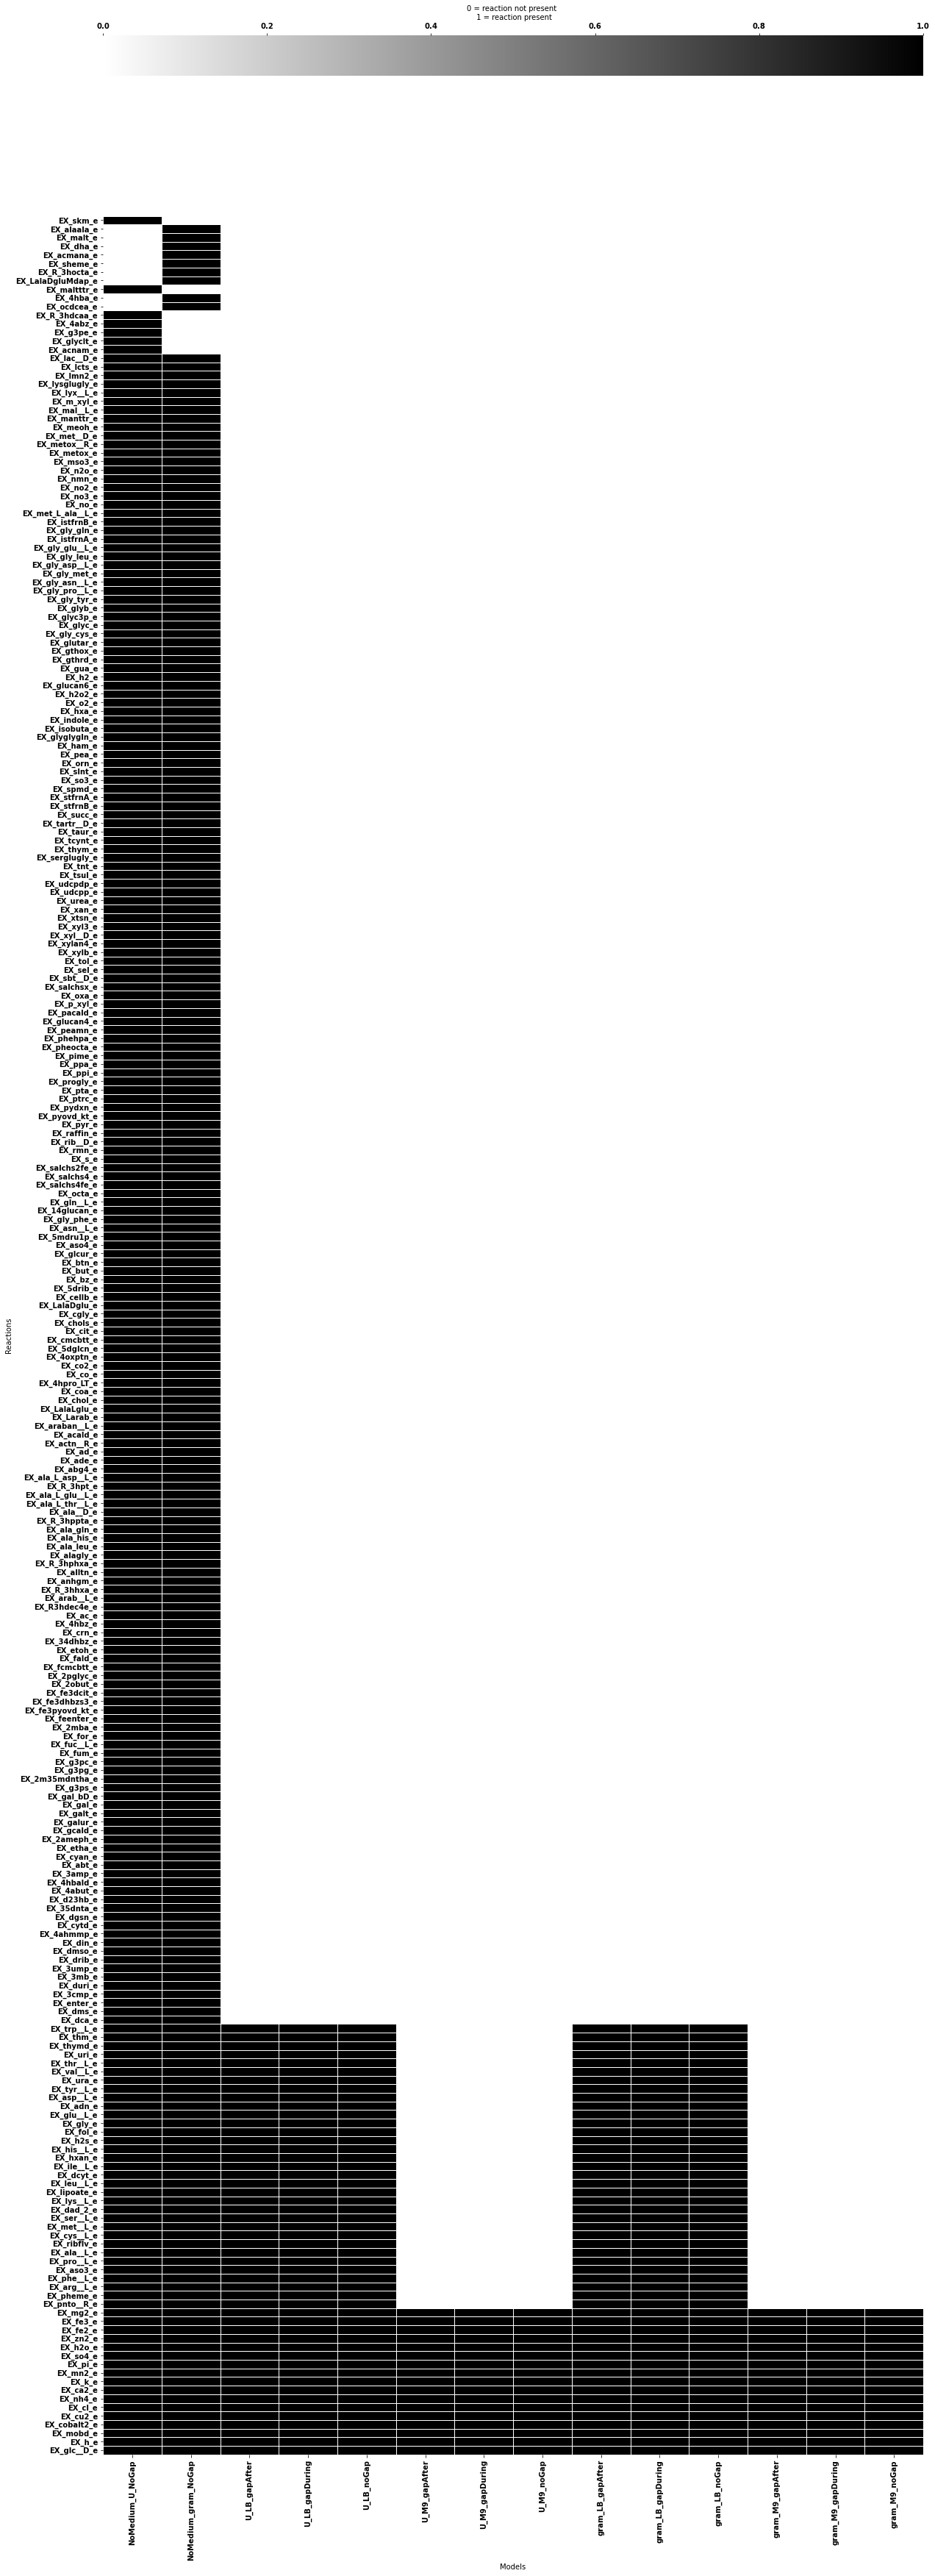

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,70))

# font = {'weight' : 'bold',
#         'size'   : 22}

# plt.rc('font', **font)

s=sns.heatmap(BinaryGramRxs_binarySorted, cmap=plt.get_cmap('binary'), xticklabels=True, yticklabels=True, cbar_kws={'label': '0 = reaction not present \n 1 = reaction present', 'location': 'top'}, linewidths=0.5)

s.set(xlabel='Models', ylabel='Reactions')

# plt.savefig('ModelsMediumHeatmap.png')